# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
tt_project = read.csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-02-25/measles.csv")
tt_project |> head()

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [7]:
# create the df_vacc_rates here

tt_project |>
    group_by(state) |>
    filter(mmr>=0) |>
    summarize(df_vacc_rates = sum(mmr>=95, na.rm=TRUE)/n())

state,df_vacc_rates
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397
Maine,0.473389356
Massachusetts,0.865828092
Minnesota,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [8]:
tt_project |>
    group_by(state) |>
    filter(mmr>=0) |>
    summarize(df_vacc_rates = sum(mmr>=95, na.rm=TRUE)/n()) |>
    arrange(df_vacc_rates)

#Arkansas has the smallest fraction

state,df_vacc_rates
<chr>,<dbl>
Arkansas,0.003527337
Washington,0.326592518
North Dakota,0.455555556
Maine,0.473389356
Minnesota,0.473948525
Ohio,0.491606715
Arizona,0.506404782
Oregon,0.593052109
Colorado,0.623092236


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

Warning message in geom_text(aes(x = 68, y = 0.75), label = "CDC recommended\nvaccination rate\n(95%)", :
“All aesthetics have length 1, but the data has 2085 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 90, y = 0.72, xend = 95, yend = 0.62), arrow = arrow(length = unit(0.02, :
“All aesthetics have length 1, but the data has 2085 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


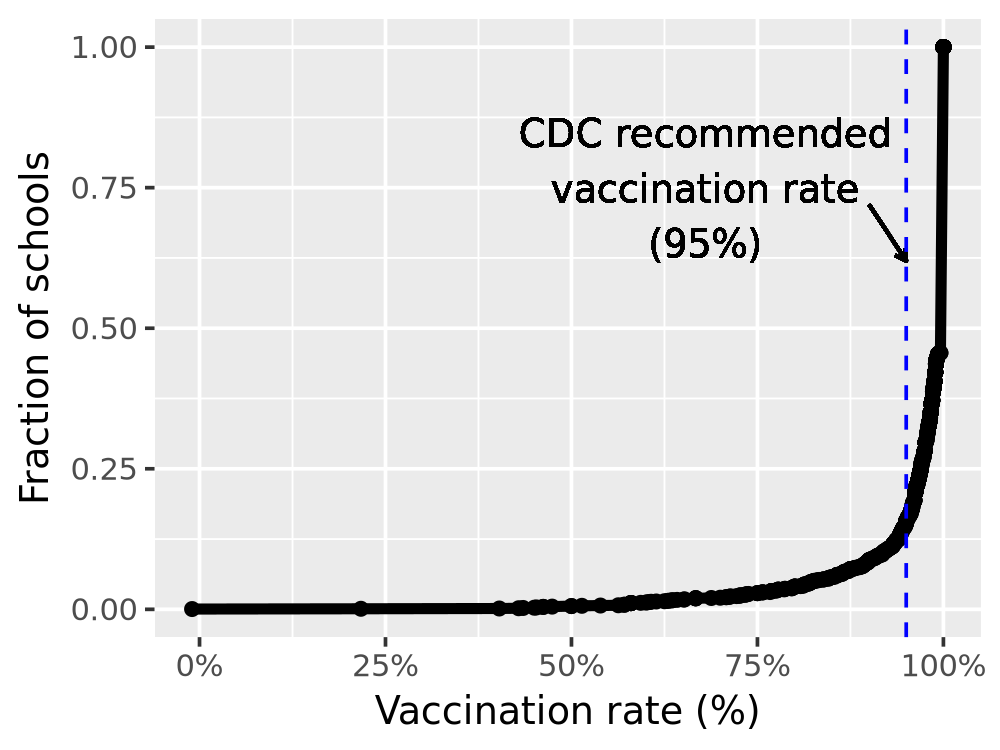

In [10]:
tt_project |>
    filter(state=='North Carolina') |>
    mutate(ecdf = cume_dist(overall)) |>
ggplot(aes(x=overall, y=ecdf)) +
    geom_point() +
    geom_line(linewidth=1.5) +
    geom_text(aes(x=68, y=.75),
              label = "CDC recommended\nvaccination rate\n(95%)",) +
    geom_segment(aes(x=90, y=.72, xend=95, yend=.62),
                arrow=arrow(length=unit(.02, 'npc'))) + 
    labs(
    x='Vaccination rate (%)',
    y='Fraction of schools'
    ) +
    scale_x_continuous(labels = scales::label_percent(scale=1)) +
    geom_vline(xintercept=95, color='blue', linetype='dashed')

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?